In [5]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [6]:
train = pd.read_excel('Project520test_train_data.xlsx',steet_name = 'train')


In [7]:
train.head()
train['y'].value_counts()

-1    1891
 1     609
Name: y, dtype: int64

In [8]:
#train.info()

In [9]:
#train.describe()

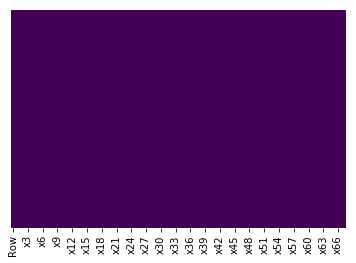

In [10]:
#checking missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#hence there is no missing data

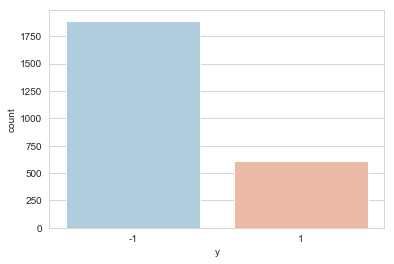

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='y',data=train,palette='RdBu_r')
#mapping y = 1 against -1

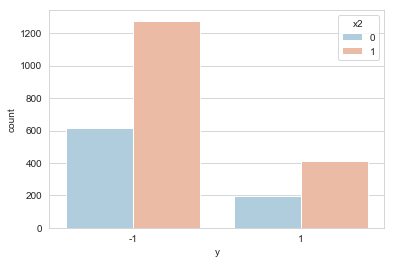

In [12]:
#result of y with various variables
sns.set_style('whitegrid')
sns.countplot(x='y',hue='x2',data=train,palette='RdBu_r')

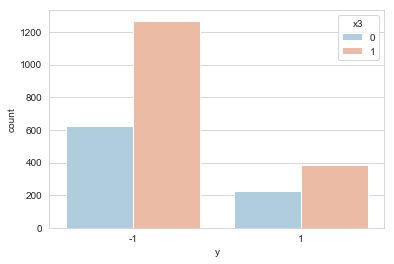

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='x3',data=train,palette='RdBu_r')

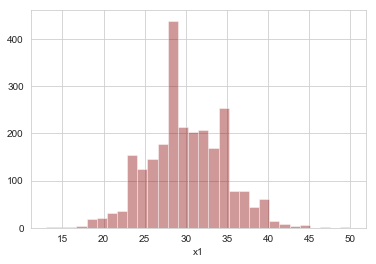

In [14]:
#histogram of x1 , possibly age
sns.distplot(train['x1'].dropna(),kde=False,color='darkred',bins=30)

In [15]:
#converting categorical to dummy and making dataset ready for analysis
#train.info()

In [16]:
x5 = pd.get_dummies(train['x5'],drop_first=True)
x13 = pd.get_dummies(train['x13'],drop_first=True)
x65 = pd.get_dummies(train['x65'],drop_first=True)
x64 = pd.get_dummies(train['x66'],drop_first=True)

In [17]:
train = pd.concat([train,x5,x13,x64,x65],axis=1)

In [18]:
#train.info()

In [19]:
train.drop(['x5','x13','x64','x65','Row'],axis=1,inplace=True)



In [20]:
#train.info()

In [21]:
train2 = train.copy()

In [22]:
train.tail()

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,B,C,D,E,beta,chi,1,NST,PT,ST
2495,34,1,0,1,5,8,8,34,53.3,54.8,...,0,1,0,0,0,0,1,0,1,0
2496,29,0,1,1,1,3,1,32,113.6,199.3,...,0,0,0,1,0,1,1,0,0,1
2497,30,0,1,1,17,12,10,21,182.4,48.5,...,0,0,0,0,1,0,1,0,0,0
2498,38,1,0,1,1,13,6,30,25.1,27.9,...,0,1,0,0,0,0,1,0,1,0
2499,26,1,1,1,14,2,3,30,10.1,145.5,...,0,0,0,1,0,1,1,0,0,1


In [23]:
#train.drop(['Row'],axis = 1 ,inplace = True)


In [24]:
#train.head()

In [25]:
#making dataset ready
#we are gonna treat our test data as the whole data

X = train.drop('y',axis = 1) #predictiors
Y = train['y']  #column that we want to predict
from sklearn.model_selection import train_test_split



In [26]:
#splitting train data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, 
                                                    random_state=101)
#X_test.info()


In [27]:
X_train.head() #inspecting the training data


,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,B,C,D,E,beta,chi,1,NST,PT,ST
537,26,1,0,1,14,13,9,33,117.2,82.2,...,0,0,1,0,0,0,1,1,0,0
379,37,0,1,1,3,2,18,29,43.1,100.7,...,0,0,0,0,1,0,1,0,0,0
753,28,1,1,0,9,6,11,38,60.2,133.0,...,0,0,0,0,1,0,0,0,0,0
1685,22,0,0,1,2,4,4,28,60.1,93.4,...,0,0,0,0,1,0,1,0,0,0
1230,33,1,1,1,12,14,1,35,118.9,141.6,...,0,1,0,0,1,0,1,0,1,0


In [28]:
y_train.head()

537    -1
379    -1
753    -1
1685    1
1230   -1
Name: y, dtype: int64

In [29]:
X_test.head()

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,B,C,D,E,beta,chi,1,NST,PT,ST
2415,29,0,1,1,10,9,15,40,60.7,75.8,...,0,0,0,1,0,1,1,0,0,1
218,28,0,0,0,2,7,14,34,26.9,121.1,...,0,0,0,0,1,0,1,0,0,0
469,30,0,0,1,15,2,17,34,141.8,100.7,...,0,0,0,0,1,0,1,0,0,0
1166,32,0,0,1,3,18,6,30,5.2,66.4,...,0,0,0,0,1,0,0,0,0,0
254,23,1,0,1,11,8,5,26,72.7,12.0,...,1,0,0,0,0,1,1,1,0,0


In [30]:
y_test.head()

2415   -1
218     1
469    -1
1166    1
254    -1
Name: y, dtype: int64

In [31]:
#We can see that our model is getting trained in the training set with 1322 instances with y = 1 is and 428 instances with y = -1
count1 = 0
count01 = 0
for i in y_train:
    if i==1:
        count1=count1+1
    if i==-1:
        count01 = count01+1
print('count of 1',count1)
print('count of -1',count01)


count of 1 428
count of -1 1322


In [32]:
y_train.value_counts()

-1    1322
 1     428
Name: y, dtype: int64

In [33]:
#We can see that our model is getting testes in the testing set with 569 instances with y = 1 is and 181 instances with y = -1
count1 = 0
count01 = 0
for i in y_test:
    if i==1:
        count1=count1+1
    if i==-1:
        count01 = count01+1
print('count of 1',count1)
print('count of -1',count01)

count of 1 181
count of -1 569


In [34]:
y_test.value_counts()

-1    569
 1    181
Name: y, dtype: int64

In [35]:
#applying logistics in unbalanced data
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression()



In [37]:
logmodel.fit(X_train,y_train)

C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.87      0.92      0.90       569
           1       0.70      0.59      0.64       181

   micro avg       0.84      0.84      0.84       750
   macro avg       0.79      0.75      0.77       750
weighted avg       0.83      0.84      0.83       750



In [41]:
from sklearn.metrics import confusion_matrix
confusion_array = confusion_matrix(y_test,predictions)
print(confusion_array)
balance_error_rate = (confusion_array[0][1]/sum(confusion_array[0])) + ((confusion_array[1][0])/sum(confusion_array[1]))

print('balance_error_rate', balance_error_rate/2)

[[524  45]
 [ 75 106]]
balance_error_rate 0.246725378438474


In [42]:
#decision trees on y_test on unbalanced data
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions_tree = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_tree))
print(confusion_matrix(y_test,predictions_tree))
confusion_array2 = confusion_matrix(y_test,predictions_tree)
balance_error_rate2 = (confusion_array2[0][1]/sum(confusion_array2[0])) + ((confusion_array2[1][0])/sum(confusion_array2[1]))

print('balance_error_rate',balance_error_rate2/2)


              precision    recall  f1-score   support

          -1       0.85      0.85      0.85       569
           1       0.53      0.54      0.54       181

   micro avg       0.77      0.77      0.77       750
   macro avg       0.69      0.69      0.69       750
weighted avg       0.78      0.77      0.77       750

[[482  87]
 [ 83  98]]
balance_error_rate 0.30573168008233886


In [43]:
#applying random forest on unbalanced data
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
confusion_array3 = confusion_matrix(y_test,rfc_pred)

balance_error_rate3 = (confusion_array3[0][1]/sum(confusion_array3[0])) + ((confusion_array3[1][0])/sum(confusion_array3[1]))

print('balance_error_rate',balance_error_rate3/2)

[[533  36]
 [ 84  97]]
              precision    recall  f1-score   support

          -1       0.86      0.94      0.90       569
           1       0.73      0.54      0.62       181

   micro avg       0.84      0.84      0.84       750
   macro avg       0.80      0.74      0.76       750
weighted avg       0.83      0.84      0.83       750

balance_error_rate 0.2636786452922157


In [44]:
#RESAMPLING
#UPSAMPLING
from sklearn.utils import resample

In [45]:
# Separate majority and minority classes
train_majority = train[train.y == -1]
train_minority = train[train.y == 1]



In [46]:
# Upsample minority class
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1891,    # to match majority class train['y'].value_counts() - 1 comes out as 1891
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

In [47]:
train_upsampled['y'].value_counts()  #in this dataframe the values of y = -1 and y = +1 are same


 1    1891
-1    1891
Name: y, dtype: int64

In [48]:
##NOT IMPORTANT
#Upsampled data sets 
y_train_upsampled = train_upsampled.y
X_train_upsampled = train_upsampled.drop('y', axis=1)
from sklearn.linear_model import LogisticRegression


# Train model Logistic regression on upsampled data
clf_1 = LogisticRegression().fit(X_train_upsampled, y_train_upsampled )

# Predict on training set
pred_y_1 = clf_1.predict(X_train_upsampled)

#prediction report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_train_upsampled,pred_y_1))
print(confusion_matrix(y_train_upsampled,pred_y_1))
confusion_array4 = confusion_matrix(y_train_upsampled,pred_y_1)

balance_error_rate4 = (confusion_array4[0][1]/sum(confusion_array4[0])) + ((confusion_array4[1][0])/sum(confusion_array4[1]))

print(balance_error_rate4)







C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

          -1       0.84      0.80      0.82      1891
           1       0.81      0.85      0.83      1891

   micro avg       0.83      0.83      0.83      3782
   macro avg       0.83      0.83      0.83      3782
weighted avg       0.83      0.83      0.83      3782

[[1511  380]
 [ 281 1610]]
0.34955050237969326


In [49]:
#Applying this loGISTIC regression model trained on upsampled data to predict on the original test data
pred_y_original_testing_data = clf_1.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pred_y_original_testing_data))
print(confusion_matrix(y_test,pred_y_original_testing_data))
confusion_array5 = confusion_matrix(y_test,pred_y_original_testing_data)

balance_error_rate5 = (confusion_array5[0][1]/sum(confusion_array5[0])) + ((confusion_array5[1][0])/sum(confusion_array5[1]))

print('balance_error_rate',balance_error_rate5/2)


              precision    recall  f1-score   support

          -1       0.94      0.78      0.85       569
           1       0.54      0.85      0.66       181

   micro avg       0.79      0.79      0.79       750
   macro avg       0.74      0.81      0.76       750
weighted avg       0.84      0.79      0.80       750

[[441 128]
 [ 28 153]]
balance_error_rate 0.18982609793278893


In [50]:

#Training decision tree on upscaled data
from sklearn.tree import DecisionTreeClassifier
dtree2 = DecisionTreeClassifier()
dtree_fitted = dtree2.fit(X_train_upsampled,y_train_upsampled)
predictions_tree2 = dtree_fitted.predict(X_train_upsampled)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train_upsampled,predictions_tree2))
print(confusion_matrix(y_train_upsampled,predictions_tree2))
confusion_array6 = confusion_matrix(y_train_upsampled,predictions_tree2)
balance_error_rate6 = (confusion_array6[0][1]/sum(confusion_array6[0])) + ((confusion_array6[1][0])/sum(confusion_array6[1]))

print(balance_error_rate6)


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1891
           1       1.00      1.00      1.00      1891

   micro avg       1.00      1.00      1.00      3782
   macro avg       1.00      1.00      1.00      3782
weighted avg       1.00      1.00      1.00      3782

[[1891    0]
 [   0 1891]]
0.0


In [51]:

#Applying this Decision tree model trained on upsampled data to predict on the original test data
from sklearn.tree import DecisionTreeClassifier
pred_y_original_testing_data2 = dtree_fitted.predict(X)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y,pred_y_original_testing_data2))
print(confusion_matrix(Y,pred_y_original_testing_data2))
confusion_array7 = confusion_matrix(Y,pred_y_original_testing_data2)

balance_error_rate7 = (confusion_array7[0][1]/sum(confusion_array7[0])) + ((confusion_array7[1][0])/sum(confusion_array7[1]))

print(balance_error_rate7)

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1891
           1       1.00      0.98      0.99       609

   micro avg       0.99      0.99      0.99      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       0.99      0.99      0.99      2500

[[1891    0]
 [  14  595]]
0.022988505747126436


In [52]:

#Training random on upscaled data
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=100)
rfc_fitted_upsampled = rfc2.fit(X_train_upsampled, y_train_upsampled )
rfc_pred2 = rfc_fitted_upsampled.predict(X_train_upsampled)
print(confusion_matrix(y_train_upsampled,rfc_pred2))
print(classification_report(y_train_upsampled,rfc_pred2))
confusion_array8 = confusion_matrix(y_train_upsampled,rfc_pred2)

balance_error_rate8 = (confusion_array8[0][1]/sum(confusion_array8[0])) + ((confusion_array8[1][0])/sum(confusion_array8[1]))

print(balance_error_rate8)

[[1891    0]
 [   0 1891]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1891
           1       1.00      1.00      1.00      1891

   micro avg       1.00      1.00      1.00      3782
   macro avg       1.00      1.00      1.00      3782
weighted avg       1.00      1.00      1.00      3782

0.0


In [53]:

#Applying this RANDOM FOREST model trained on upsampled data to predict on the original test data
pred_y_original_testing_data2 = rfc_fitted_upsampled.predict(X)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(Y,pred_y_original_testing_data2))
print(confusion_matrix(Y,pred_y_original_testing_data2))
confusion_array7 = confusion_matrix(Y,pred_y_original_testing_data2)

balance_error_rate7 = (confusion_array7[0][1]/sum(confusion_array7[0])) + ((confusion_array7[1][0])/sum(confusion_array7[1]))

print(balance_error_rate7)


              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1891
           1       1.00      0.98      0.99       609

   micro avg       1.00      1.00      1.00      2500
   macro avg       1.00      0.99      0.99      2500
weighted avg       1.00      1.00      1.00      2500

[[1891    0]
 [  12  597]]
0.019704433497536946


In [54]:
y_train.value_counts()


-1    1322
 1     428
Name: y, dtype: int64

In [55]:

#RESAMPLING
#UPSAMPLING
#Splitting training data into 2 portions - training and testing and then , upsampling on training data and then testing on testing data
#splitted_train_data = pd.concat([X_train,y_train])
#splitted_train_data
from sklearn.model_selection import train_test_split

splitted_train_data, splitted_test_data = train_test_split(train2, test_size=0.2)
from sklearn.utils import resample
train_majority2 = splitted_train_data[splitted_train_data.y == -1]
train_minority2 = splitted_train_data[splitted_train_data.y == 1]




In [56]:
# Upsample minority class
train_minority_upsampled2 = resample(train_minority2, 
                                 replace=True,     # sample with replacement
                                 n_samples=1523,    # to match majority class splitted_train_data['y'].value_counts() - 1 comes out as 1891
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_upsampled2 = pd.concat([train_majority2, train_minority2])

In [57]:
y_train_upsampled23 = train_upsampled2.y
X_train_upsampled23 = train_upsampled2.drop('y', axis=1)
y_test_upsampled23 = splitted_test_data.y
X_test_upsampled23= splitted_test_data.drop('y', axis=1)

In [58]:
X_test_upsampled23.head()

,x1,x2,x3,x4,x6,x7,x8,x9,x10,x11,...,B,C,D,E,beta,chi,1,NST,PT,ST
1720,31,1,1,1,10,13,2,35,118.4,106.3,...,0,0,0,0,1,0,1,0,0,0
1626,27,0,0,1,0,17,5,28,123.3,124.6,...,1,0,0,0,0,1,1,0,0,0
237,31,0,0,1,15,16,8,30,24.4,93.0,...,0,0,0,1,1,0,1,1,0,0
1962,27,1,0,1,4,16,16,35,26.8,192.8,...,0,1,0,0,1,0,1,1,0,0
1185,31,1,1,1,9,13,15,26,35.2,186.2,...,0,0,0,0,1,0,1,0,0,0


In [59]:
#TRAINING RANDOM FOREST ON THIS SAMPLES AND TESTING ON TETSING DATA(AFTER UPSAMPLING)
from sklearn.ensemble import RandomForestClassifier
rfc5 = RandomForestClassifier(n_estimators=100)
rfc_SAMPLED_upsampled= rfc5.fit(X_train_upsampled23, y_train_upsampled23)
rfc_pred23 = rfc_SAMPLED_upsampled.predict(X_test_upsampled23)
print(confusion_matrix(y_test_upsampled23 ,rfc_pred23))
print(classification_report(y_test_upsampled23 ,rfc_pred23))
confusion_array10 = confusion_matrix(y_test_upsampled23 ,rfc_pred23)

balance_error_rate10 = (confusion_array10[0][1]/sum(confusion_array10[0])) + ((confusion_array10[1][0])/sum(confusion_array10[1]))

print('balance error rate',balance_error_rate10/2)


[[346  22]
 [ 52  80]]
              precision    recall  f1-score   support

          -1       0.87      0.94      0.90       368
           1       0.78      0.61      0.68       132

   micro avg       0.85      0.85      0.85       500
   macro avg       0.83      0.77      0.79       500
weighted avg       0.85      0.85      0.85       500

balance error rate 0.22686100131752304


In [60]:
#TRAINING Logistics ON THIS SAMPLES AND TESTING ON TETSING DATA(AFTER UPSAMPLING)
from sklearn.linear_model import LogisticRegression
logmodel_train2_train_upsampled = LogisticRegression()
logmodel_train2_train_upsampled.fit(X_train_upsampled23,y_train_upsampled23)
logmodel_train2_upsampled_predictions_logistics = logmodel_train2_train_upsampled.predict(X_test_upsampled23)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_upsampled23,logmodel_train2_upsampled_predictions_logistics))
print(confusion_matrix(y_test_upsampled23,logmodel_train2_upsampled_predictions_logistics))
confusion_array25 = confusion_matrix(y_test_upsampled23,logmodel_train2_upsampled_predictions_logistics)

balance_error_rate25 = (confusion_array25[0][1]/sum(confusion_array25[0])) + ((confusion_array25[1][0])/sum(confusion_array25[1]))

print('balance error rate',balance_error_rate25/2)

              precision    recall  f1-score   support

          -1       0.88      0.92      0.90       368
           1       0.74      0.65      0.69       132

   micro avg       0.85      0.85      0.85       500
   macro avg       0.81      0.78      0.80       500
weighted avg       0.84      0.85      0.84       500

[[338  30]
 [ 46  86]]
balance error rate 0.21500329380764166


C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
##Not important
rfc_pred24 = rfc_SAMPLED_upsampled.predict(X)
print(confusion_matrix(Y ,rfc_pred24))
print(classification_report(Y ,rfc_pred24))
confusion_array11 = confusion_matrix(Y ,rfc_pred24)

balance_error_rate11 = (confusion_array11[0][1]/sum(confusion_array11[0])) + ((confusion_array11[1][0])/sum(confusion_array11[1]))

print(balance_error_rate11)


[[1869   22]
 [  52  557]]
              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1891
           1       0.96      0.91      0.94       609

   micro avg       0.97      0.97      0.97      2500
   macro avg       0.97      0.95      0.96      2500
weighted avg       0.97      0.97      0.97      2500

0.09701993454432413


In [62]:
#APPLYING SMOTE
from imblearn.over_sampling import SMOTE

In [63]:
smt = SMOTE()


In [64]:
X_train_smote, y_train_smote = smt.fit_sample(X_train, y_train)

In [65]:
pd.value_counts(pd.Series(y_train_smote)) #converting numpy array into pd and using value.counts
#we have equal +1s and -1s

 1    1322
-1    1322
dtype: int64

In [66]:
#applying logistics regression

In [67]:
#applying logistics in to data by SMOTE (trained on smote trained data, tested on test data)
from sklearn.linear_model import LogisticRegression
logmodel_smote = LogisticRegression()
logmodel_smote.fit(X_train_smote,y_train_smote)
predictions_smote_logistics = logmodel_smote.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions_smote_logistics))
print(confusion_matrix(y_test,predictions_smote_logistics))
confusion_array13 = confusion_matrix(y_test,predictions_smote_logistics)

balance_error_rate13 = (confusion_array13[0][1]/sum(confusion_array13[0])) + ((confusion_array13[1][0])/sum(confusion_array13[1]))

print('balance error rate',balance_error_rate13/2)


              precision    recall  f1-score   support

          -1       0.93      0.75      0.83       569
           1       0.51      0.82      0.63       181

   micro avg       0.77      0.77      0.77       750
   macro avg       0.72      0.78      0.73       750
weighted avg       0.83      0.77      0.78       750

[[426 143]
 [ 33 148]]
balance error rate 0.21681927196108325


C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
#applying logistics in to data by SMOTE (trained on smote trained data, tested on test data)
from sklearn.linear_model import LogisticRegression
logmodel_smote = LogisticRegression(C=100)
logmodel_smote.fit(X_train_smote,y_train_smote)
predictions_smote_logistics = logmodel_smote.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions_smote_logistics))
print(confusion_matrix(y_test,predictions_smote_logistics))
confusion_array13 = confusion_matrix(y_test,predictions_smote_logistics)

balance_error_rate13 = (confusion_array13[0][1]/sum(confusion_array13[0])) + ((confusion_array13[1][0])/sum(confusion_array13[1]))

print('balance error rate',balance_error_rate13/2)


C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

          -1       0.93      0.76      0.83       569
           1       0.51      0.81      0.63       181

   micro avg       0.77      0.77      0.77       750
   macro avg       0.72      0.78      0.73       750
weighted avg       0.83      0.77      0.78       750

[[430 139]
 [ 34 147]]
balance error rate 0.21606676441173328


In [78]:
#applying logistics in to data by SMOTE (trained on smote trained data, tested on test data)
from sklearn.linear_model import LogisticRegression
logmodel_smote = LogisticRegression(C=100, penalty = 'l1')
logmodel_smote.fit(X_train_smote,y_train_smote)
predictions_smote_logistics = logmodel_smote.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions_smote_logistics))
print(confusion_matrix(y_test,predictions_smote_logistics))
confusion_array13 = confusion_matrix(y_test,predictions_smote_logistics)

balance_error_rate13 = (confusion_array13[0][1]/sum(confusion_array13[0])) + ((confusion_array13[1][0])/sum(confusion_array13[1]))

print('balance error rate',balance_error_rate13/2)

              precision    recall  f1-score   support

          -1       0.92      0.76      0.83       569
           1       0.51      0.81      0.63       181

   micro avg       0.77      0.77      0.77       750
   macro avg       0.72      0.78      0.73       750
weighted avg       0.83      0.77      0.78       750

[[430 139]
 [ 35 146]]
balance error rate 0.21882919535095982


C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [70]:
#Trying grid search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logistic_gridsearch = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 1, 100]
hyperparameters = dict(C=C, penalty=penalty)
best_clf = GridSearchCV(logistic_gridsearch, hyperparameters, cv =5 , verbose=0)
best_model = best_clf.fit(X_train_smote,y_train_smote)
print('Best Parameters',best_clf.best_params_)

C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to '

Best Parameters {'C': 100, 'penalty': 'l1'}


C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
#applying Random forrest in to data by SMOTE
from sklearn.ensemble import RandomForestClassifier
rfc_smote = RandomForestClassifier(n_estimators=100)
rfc_smote.fit(X_train_smote,y_train_smote)
rfc_pred_smote  = rfc_smote.predict(X_test)
print(confusion_matrix(y_test,rfc_pred_smote))
print(classification_report(y_test,rfc_pred_smote))
confusion_array14 = confusion_matrix(y_test,rfc_pred_smote)

balance_error_rate14 = (confusion_array14[0][1]/sum(confusion_array14[0])) + ((confusion_array14[1][0])/sum(confusion_array14[1]))

print('balance error rate', balance_error_rate14/2)


[[503  66]
 [ 65 116]]
              precision    recall  f1-score   support

          -1       0.89      0.88      0.88       569
           1       0.64      0.64      0.64       181

   micro avg       0.83      0.83      0.83       750
   macro avg       0.76      0.76      0.76       750
weighted avg       0.83      0.83      0.83       750

balance error rate 0.2375544961112352


In [72]:
logmodel_smote.get_params()

{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [73]:

best_clf.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'warn',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'warn',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'C': [0.0001, 0.001, 0.01, 1, 100], 'penalty': ['l1', 'l2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

In [89]:
#trying svm
from sklearn.svm import SVC
model_svc_smote = SVC()


In [90]:
model_svc_smote.fit(X_train_smote,y_train_smote)
model_svc_pred_smote  = model_svc_smote.predict(X_test)
print(confusion_matrix(y_test,model_svc_pred_smote))
print(classification_report(y_test,model_svc_pred_smote))
confusion_array22 = confusion_matrix(y_test,model_svc_pred_smote)
#balance_error_rate29 = (confusion_array29[0][1]/sum(confusion_array29[0])) + ((confusion_array29[1][0])/sum(confusion_array29[1]))

#print('balance error rate', balance_error_rate29/2)
#as we can

C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[569   0]
 [181   0]]
              precision    recall  f1-score   support

          -1       0.76      1.00      0.86       569
           1       0.00      0.00      0.00       181

   micro avg       0.76      0.76      0.76       750
   macro avg       0.38      0.50      0.43       750
weighted avg       0.58      0.76      0.65       750



C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
#as we can see all are getting identified as one so we need to adjust parameters
param_grid_svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid_svm = GridSearchCV(SVC(),param_grid_svm,refit=True,verbose=3)
grid_svm.fit(X_train_smote,y_train_smote)

C:\Users\Jay Bhanushali\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5136054421768708, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5045351473922902, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.5102272727272728, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.518140589569161, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5079365079365079, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.5215909090909091, total=   0.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5113378684807256, total=   0.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5170068027210885, total=   0.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.5147727272727273, total=   0.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ......

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9070294784580499, total=   0.6s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8977272727272727, total=   0.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5317460317460317, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.518140589569161, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5284090909090909, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.6009070294784581, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5532879818594104, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [92]:
grid_svm.best_params_

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [94]:
grid_svm.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
grid_predictions_svm = grid_svm.predict(X_test)

In [96]:
print(confusion_matrix(y_test,grid_predictions_svm))

[[491  78]
 [126  55]]


In [97]:
print(classification_report(y_test,grid_predictions_svm))

              precision    recall  f1-score   support

          -1       0.80      0.86      0.83       569
           1       0.41      0.30      0.35       181

   micro avg       0.73      0.73      0.73       750
   macro avg       0.60      0.58      0.59       750
weighted avg       0.70      0.73      0.71       750

